# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [660]:
import glob
import os
import re
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from calendar import monthrange
sns.set_context('notebook')
np.set_printoptions(threshold='nan')

In [527]:
DATA_FOLDER = 'Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

## Solution
We first load the csv files for each country

In [528]:
path_guinea = DATA_FOLDER + '/ebola/guinea_data/' 
path_liberia = DATA_FOLDER + '/ebola/liberia_data/'
path_sierraleone = DATA_FOLDER + '/ebola/sl_data/'

# There should be 22 files for Guinea
all_guinea_files = glob.glob(os.path.join(path_guinea, "*.csv"))    
print('Found '+str(len(all_guinea_files))+' csv files for Guinea')

# There should be 100 files for Liberia
all_liberia_files = glob.glob(os.path.join(path_liberia, "*.csv"))
print('Found '+str(len(all_liberia_files))+' csv files for Liberia')

# There should be 103 files for Sierra Leone
all_sierraleone_files = glob.glob(os.path.join(path_sierraleone, "*.csv"))
print('Found '+str(len(all_sierraleone_files))+' csv files for Sierra Leone')


guinea_df = pd.concat((pd.read_csv(f) for f in all_guinea_files), ignore_index=True)
liberia_df = pd.concat((pd.read_csv(f) for f in all_liberia_files), ignore_index=True)
sierraleone_df = pd.concat((pd.read_csv(f) for f in all_sierraleone_files), ignore_index=True)

Found 22 csv files for Guinea
Found 100 csv files for Liberia
Found 103 csv files for Sierra Leone


We take a look to see how the columns are organized. We see that the event description does not have the same name in the 3 countries. Therefore we rename the corresponding columns so that we can properly concatenate. 

In [723]:
idx = pd.date_range('06-01-2014', '12-30-2014')

In [809]:
guinea_data = guinea_df.copy()
guinea_data.Date = pd.to_datetime(guinea_data.Date)

with pd.option_context('display.max_rows', None, 'display.max_columns', 100):
    print(guinea_data[['Date', 'Description', 'Totals']].head())

guinea_data = guinea_data[['Date', 'Description', 'Totals']]
guinea_data.Description = guinea_data.Description.str.lower()

death_regexp = re.compile('(?!total)(?!number)(?!cumulative)(?!.*etc).*death.*')
newcase_regexp = re.compile('(?!total)(?!cumulative)(?!.*cum)(?!.*_cum_)' +
               '(?!.*cfr)(?!.*corpse)(?!.*admission)(?!.*sample)(?!pending)(?!percent)'+
               '(?!population)(?!.*noncase)(?!specimen)(?!.*follow-up)(?!.*number)'+
               '(?!.*cte)(?!.*etc)(?!.*rate)(?!.*contact)(?!.*negative)(?!.*death)')

guinea_data_deaths = guinea_data[guinea_data.Description.str.match(death_regexp)][['Date', 'Totals']]
guinea_data_cases = guinea_data[guinea_data.Description.str.match(newcase_regexp)][['Date', 'Totals']]

guinea_data_deaths = guinea_data_deaths.set_index('Date')
guinea_data_cases = guinea_data_cases.set_index('Date')
guinea_data_deaths.columns = ['Registered new deaths']
guinea_data_cases.columns = ['Registered new cases']

guinea_data_cases = guinea_data_cases.astype(float)
guinea_data_deaths = guinea_data_deaths.astype(float)
guinea_data_deaths

        Date                        Description Totals
0 2014-08-04              New cases of suspects      5
1 2014-08-04             New cases of probables      0
2 2014-08-04             New cases of confirmed      4
3 2014-08-04  Total new cases registered so far      9
4 2014-08-04            Total cases of suspects     11


,Registered new deaths
Date,
2014-08-04,2.0
2014-08-04,2.0
2014-08-04,0.0
2014-08-04,0.0
2014-08-26,5.0
2014-08-26,0.0
2014-08-27,2.0
2014-08-27,0.0
2014-08-30,5.0


In [816]:
guinea_data_cases = guinea_data_cases.groupby(guinea_data_cases.index).sum()
guinea_data_deaths = guinea_data_deaths.groupby(guinea_data_deaths.index).sum()

guinea_data = guinea_data_cases.merge(guinea_data_deaths, left_index=True, right_index=True, how='outer')

guinea_data = guinea_data.reindex(idx, fill_value=0)
guinea_data.index = guinea_data.index.month

guinea_data=guinea_data.groupby(guinea_data.index).mean()
guinea_data

,Registered new cases,Registered new deaths
6,0.00000,0.000000
7,0.00000,0.000000
8,4.16129,0.612903
9,10.70000,1.900000
10,1.16129,0.483871
11,0.00000,0.000000
12,0.00000,0.000000


In [ ]:
guinea_data_deaths = guinea_data_deaths.set_index('Date')
guinea_data_deaths = guinea_data_deaths.astype(float).groupby('Date').sum()

guinea_data_cases = guinea_data_cases.set_index('Date')
guinea_data_cases = guinea_data_cases.astype(float).groupby('Date').sum()


guinea_data_deaths = guinea_data_deaths.reindex(idx, fill_value=0)
guinea_data_cases = guinea_data_cases.reindex(idx, fill_value=0)

guinea_data = guinea_data_cases.join(guinea_data_deaths, how='inner')
guinea_data_deaths.index = guinea_data_deaths.index.month
guinea_data_deaths.index.names = ['Month']
guinea_data_deaths = guinea_data_deaths.groupby('Month').mean()
guinea_data_deaths
guinea_data

In [530]:
mod_liberia_df = liberia_df.rename(columns = {'Variable' : 'Description'})
mod_liberia_df.Date = pd.to_datetime(mod_liberia_df.Date)
mod_liberia_df['Country'] = 'Liberia'
mod_liberia_df

,Bomi County,Bong County,Date,Gbarpolu County,Grand Bassa,Grand Cape Mount,Grand Gedeh,Grand Kru,Lofa County,Margibi County,Maryland County,Montserrado County,National,Nimba County,River Gee County,RiverCess County,Sinoe County,Unnamed: 18,Description,Country
0,NaN,NaN,2014-06-16,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,Specimens collected,Liberia
1,NaN,NaN,2014-06-16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Specimens pending for testing,Liberia
2,NaN,NaN,2014-06-16,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,7.0,28.0,NaN,NaN,NaN,NaN,NaN,Total specimens tested,Liberia
3,NaN,NaN,2014-06-16,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,Newly reported deaths,Liberia
4,NaN,NaN,2014-06-16,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,0.0,8.0,NaN,NaN,NaN,NaN,NaN,Total death/s in confirmed cases,Liberia
5,NaN,NaN,2014-06-16,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0.0,6.0,NaN,NaN,NaN,NaN,NaN,Total death/s in probable cases,Liberia
6,NaN,NaN,2014-06-16,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,Total death/s in suspected cases,Liberia
7,NaN,NaN,2014-06-16,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,0.0,16.0,NaN,NaN,NaN,NaN,NaN,"Total death/s in confirmed, probable, suspecte...",Liberia
8,NaN,NaN,2014-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Case Fatality Rate (CFR) - Confirmed & Probabl...,Liberia
9,NaN,NaN,2014-06-16,NaN,NaN,NaN,NaN,NaN,41.0,NaN,NaN,0.0,41.0,NaN,NaN,NaN,NaN,NaN,Newly reported contacts,Liberia


In [651]:
mod_sierraleone_df = sierraleone_df.rename(columns={'variable' : 'Description', 'date':'Date'})
mod_sierraleone_df.Date = pd.to_datetime(mod_sierraleone_df.Date)
mod_sierraleone_df['Country'] = 'Sierra Leone'
mod_sierraleone_df = mod_sierraleone_df.drop(['National', 'Western area combined', 'Unnamed: 18'], axis=1)
mod_sierraleone_df.at[3014, 'Port Loko'] = 164 #There was a typo in the data. The sum did not match
mod_sierraleone_df.head()

,34 Military Hospital,Bo,Bo EMC,Bombali,Bonthe,Hastings-F/Town,Kailahun,Kambia,Kenema,Kenema (IFRC),...,Police traning School,Port Loko,Pujehun,Tonkolili,Western area,Western area rural,Western area urban,Date,Description,Country
0,NaN,654142,NaN,494139,168729,NaN,465048,341690,653013,NaN,...,NaN,557978,335574,434937,NaN,263619,1040888,2014-08-12,population,Sierra Leone
1,NaN,0,NaN,0,0,NaN,0,0,3,NaN,...,NaN,1,0,0,NaN,0,0,2014-08-12,new_noncase,Sierra Leone
2,NaN,1,NaN,0,0,NaN,0,0,9,NaN,...,NaN,0,0,0,NaN,0,0,2014-08-12,new_suspected,Sierra Leone
3,NaN,1,NaN,0,0,NaN,0,0,0,NaN,...,NaN,0,0,0,NaN,0,0,2014-08-12,new_probable,Sierra Leone
4,NaN,0,NaN,0,0,NaN,0,0,9,NaN,...,NaN,2,0,0,NaN,0,0,2014-08-12,new_confirmed,Sierra Leone


In [629]:
data = pd.concat([mod_guinea_df, mod_liberia_df, mod_sierraleone_df])

#Reorganize so we have the description column first
c2 = data[['Description', 'Date', 'Country']]
data.drop(labels=['Description', 'Date', 'Country'], axis=1,inplace = True)
data.insert(0, 'Date', c2['Date'])
data.insert(1, 'Country', c2['Country'])
data.insert(2, 'Description', c2['Description'])
print(data.shape)
data.head()

#data.Description.unique

(7128, 65)


,Date,Country,Description,34 Military Hospital,Beyla,Bo,Bo EMC,Boffa,Bombali,Bomi County,...,Siguiri,Sinoe County,Telimele,Tonkolili,Totals,Unnamed: 18,Western area,Western area rural,Western area urban,Yomou
0,2014-08-04,Guinea,New cases of suspects,NaN,NaN,NaN,NaN,0,NaN,NaN,...,0,NaN,0,NaN,5,NaN,NaN,NaN,NaN,NaN
1,2014-08-04,Guinea,New cases of probables,NaN,NaN,NaN,NaN,0,NaN,NaN,...,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2014-08-04,Guinea,New cases of confirmed,NaN,NaN,NaN,NaN,0,NaN,NaN,...,0,NaN,0,NaN,4,NaN,NaN,NaN,NaN,NaN
3,2014-08-04,Guinea,Total new cases registered so far,NaN,NaN,NaN,NaN,0,NaN,NaN,...,0,NaN,0,NaN,9,NaN,NaN,NaN,NaN,NaN
4,2014-08-04,Guinea,Total cases of suspects,NaN,NaN,NaN,NaN,0,NaN,NaN,...,0,NaN,0,NaN,11,NaN,NaN,NaN,NaN,NaN


In [697]:
data.Description = data.Description.str.lower()

#Testing the regex for deaths. We don't count admits to Centre Traitement Ebola (CTE-ETC)
print(data['Description'][data.Description.str.match(death_regexp)].unique())

#Testing the regex for new cases. We count suspect cases, don't count admits to Centre Traitement Ebola (CTE-ETC)
data['Description'][data.Description.str.match(newcase_regexp)].unique()

TypeError: unorderable types: int() > str()

In [631]:
newcase_data = data[(data.Description.str.match(newcase_regexp))].copy()
death_data =  data[(data.Description.str.match(death_regexp))].copy()

newcase_data.drop(labels=['Totals', 'Description'], axis=1,inplace = True)
death_data.drop(labels=['Totals', 'Description'], axis=1, inplace = True)

#newcase_data.Date = [datetime.datetime(y , m, 1) for y, m in zip(newcase_data.Date.dt.year, newcase_data.Date.dt.month)]
#death_data.Date = death_data.Date.dt.month



In [653]:
idx = pd.date_range('06-01-2014', '12-30-2014')

indexed_death_data = death_data.set_index('Date')
indexed_cases_data = newcase_data.set_index('Date')

cases = indexed_cases_data[['Country']].copy()
cases['Total cases'] = indexed_cases_data.iloc[:,1:].astype(float).sum(axis=1)
cases = cases.groupby(['Country', 'Date']).sum()
cases = cases.unstack(level=0)
cases = cases.reindex(idx, fill_value=0)
cases.index = cases.index.month
cases = cases.stack('Country').swaplevel(0,1).sort_index()
cases.index.names = ['Country', 'Date']
cases

deaths = indexed_death_data[['Country']].copy()
deaths['Total deaths'] = indexed_death_data.iloc[:,1:].astype(float).sum(axis=1)
#deaths = deaths.groupby(['Country', 'Date']).sum()
#deaths = deaths.unstack(level=0)
#deaths = deaths.reindex(idx, fill_value=0)
deaths.index = deaths.index.month
#deaths = deaths.stack('Country').swaplevel(0,1).sort_index()
#deaths.index.names = ['Country', 'Date']
deaths

,Country,Total deaths
Date,,
8,Guinea,2.0
8,Guinea,2.0
8,Guinea,0.0
8,Guinea,0.0
8,Guinea,12.0
8,Guinea,8.0
8,Guinea,0.0
8,Guinea,5.0
8,Guinea,0.0


In [654]:
cases_grouped = cases.reset_index(level=1)

cases_grouped = cases_grouped.groupby(['Country', 'Date']).mean()
cases_grouped

#deaths_grouped = deaths.reset_index(level=1)

deaths_grouped = deaths.groupby(['Country', 'Date']).mean()
deaths_grouped

Total deaths
Country      Date              
Guinea       8         2.533333
             9         1.781250
             10        7.500000
Liberia      6         2.071429
             7         4.818182
             8        24.333333
             9        36.666667
             10       28.140000
             11       13.566667
             12        0.000000
Sierra Leone 8       124.683333
             9       166.919540
             10      389.380952
             11      359.777778
             12      535.866667

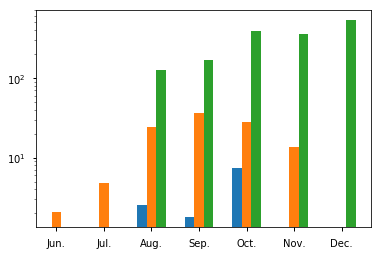

In [655]:
x = np.array(range(8,11))
w = 0.2
plt.bar(x-w, deaths_grouped.loc['Guinea'].values, width=w, align='center')
x = np.array(range(6, 13))
plt.xticks(x, ['Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.'])
plt.bar(x, deaths_grouped.loc['Liberia'].values, width=w, align='center')
x = np.array(range(8, 13))
plt.bar(x+w, deaths_grouped.loc['Sierra Leone'].values , width=w, align='center')
plt.yscale('log')
plt.show()

#### Note: 
The columns 'date' in the three dataframes and 'variable' in the dataframes for Liberia and Sierra Leone coalesced.

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [656]:
# Write your answer here

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [657]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [658]:
# Write your answer here